In [12]:
# 基评估器
# n_estimators  --

%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [13]:
wine = load_wine()

In [14]:
wine.data.shape

(178, 13)

In [15]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(wine.data,wine.target, test_size=0.3)


In [17]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [19]:
score_clf = clf.score(X_test,Y_test)
score_rfc = rfc.score(X_test,Y_test)

In [20]:
print("Sing Tree: {}, Random ForestClassifier:{}".format(score_clf,score_rfc))

Sing Tree: 0.9444444444444444, Random ForestClassifier:1.0


In [26]:
# k 折交叉验证

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target,cv=10)

rfc_s

array([0.94444444, 1.        , 0.83333333, 0.94444444, 0.94444444,
       1.        , 1.        , 1.        , 1.        , 1.        ])

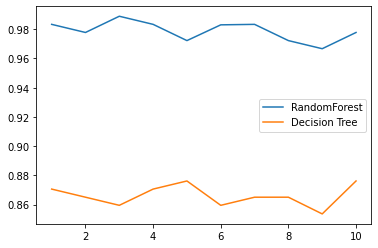

In [30]:
clf_mean_score = []
rfc_mean_score = []

for i in range(10):

    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_mean_score.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target,cv=10).mean()
    clf_mean_score.append(clf_s)

plt.plot(range(1,11), rfc_mean_score, label = "RandomForest")
plt.plot(range(1,11), clf_mean_score, label = "Decision Tree")

plt.legend()
plt.show()

nan


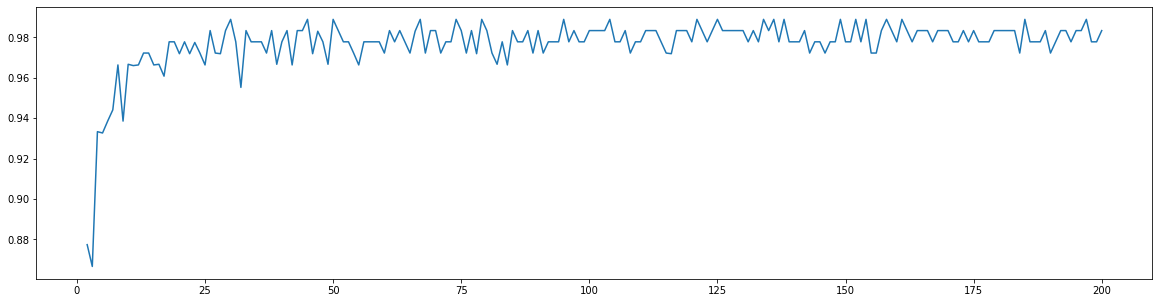

0.9888888888888889


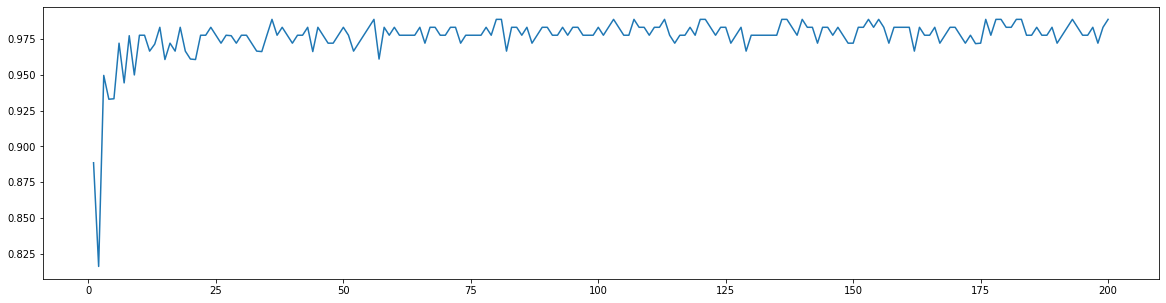

In [32]:
supersa = []
for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()

    supersa.append(rfc_s)

print(max(supersa))

plt.figure(figsize=[20,5])
plt.plot(range(1,201),supersa)
plt.show()

In [34]:
# 调参
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np

In [35]:
data = load_breast_cancer()

In [37]:
data.data.shape

(569, 30)

In [43]:
# data.target

In [42]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10)
score_pre.mean()

0.9648809523809524

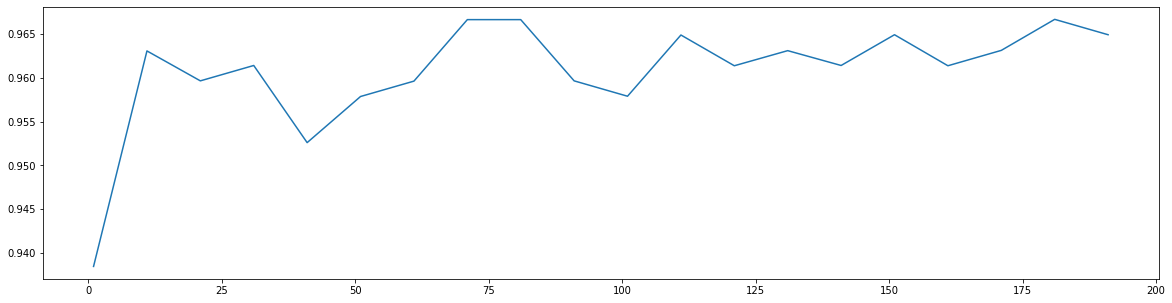

In [53]:
supersa = []
for i in range(1,201,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_s = cross_val_score(rfc, data.data, data.target, cv=10).mean()

    supersa.append(rfc_s)

plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),supersa)
plt.show()

In [52]:
# [*range(1,10)][::-1].index(9)

0

In [55]:
"""
param_grid = {
    'n_estimators' : np.arange(0,200,10)
}

param_grid = {
    'max_depth' : np.arange(1,20,1)
}

param_grid = {
    'min_samples_leaf' : np.arange(25,50,1)
}
"""
param_grid = {
    'max_depth' : np.arange(1,20,1)
}
rfc = RandomForestClassifier(n_estimators=39,
                            random_state=90)
# rfc_s = cross_val_score(rfc, data.data, data.target, cv=10).mean()

GS = GridSearchCV(rfc,param_grid,cv=10)

GS.fit(data.data,data.target)
GS.best_score_
GS.best_params_

{'max_depth': 6}

In [56]:
GS.best_score_


0.9631265664160402